In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load all sheets from the Excel file
excel_file = 'DigitizedBooks.xlsx'
sheets = pd.read_excel(excel_file, sheet_name=None, engine='openpyxl')


In [9]:
# Combine all sheets into one DataFrame with sheet name as source
combined_data = []

for sheet_name, df in sheets.items():
    df['source_sheet'] = sheet_name
    combined_data.append(df)

df_all = pd.concat(combined_data, ignore_index=True)

In [10]:
# Standardize column names
df_all.columns = (
    df_all.columns.str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace(r'[^\w\s]', '', regex=True)
)


In [11]:
# Clean the language column
if 'language' in df_all.columns:
    df_all['language'] = df_all['language'].astype(str).str.replace(' ,', ',').str.replace(', ', ',').str.lower()



In [12]:
# Convert data types
if 'number_of_pages' in df_all.columns:
    df_all['number_of_pages'] = pd.to_numeric(df_all['number_of_pages'], errors='coerce')

if 'year_of_publishing' in df_all.columns:
    df_all['year_of_publishing'] = pd.to_numeric(df_all['year_of_publishing'], errors='coerce')



In [13]:
# Handle missing values
df_all.fillna({'name_of_the_author': 'Unknown', 'publishers': 'Unknown', 'digitized_by': 'Unknown'}, inplace=True)
df_all['number_of_pages'].fillna(0, inplace=True)
df_all['year_of_publishing'].fillna(0, inplace=True)

# Summary statistics
total_books = len(df_all)
total_pages = int(df_all['number_of_pages'].sum())
unique_authors = df_all['name_of_the_author'].nunique() if 'name_of_the_author' in df_all.columns else 0
unique_publishers = df_all['publishers'].nunique() if 'publishers' in df_all.columns else 0
unique_contributors = df_all['digitized_by'].nunique() if 'digitized_by' in df_all.columns else 0
oldest_year = int(df_all['year_of_publishing'].min())
newest_year = int(df_all['year_of_publishing'].max())

print("Summary Statistics:")
print(f"Total Books: {total_books}")
print(f"Total Pages: {total_pages}")
print(f"Unique Authors: {unique_authors}")
print(f"Unique Publishers: {unique_publishers}")
print(f"Unique Contributors: {unique_contributors}")
print(f"Oldest Year: {oldest_year}")
print(f"Newest Year: {newest_year}")


Summary Statistics:
Total Books: 151
Total Pages: 10102
Unique Authors: 36
Unique Publishers: 35
Unique Contributors: 4
Oldest Year: 0
Newest Year: 2024


C:\Users\hp\AppData\Local\Temp\ipykernel_20720\3043950157.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_all['number_of_pages'].fillna(0, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_20720\3043950157.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

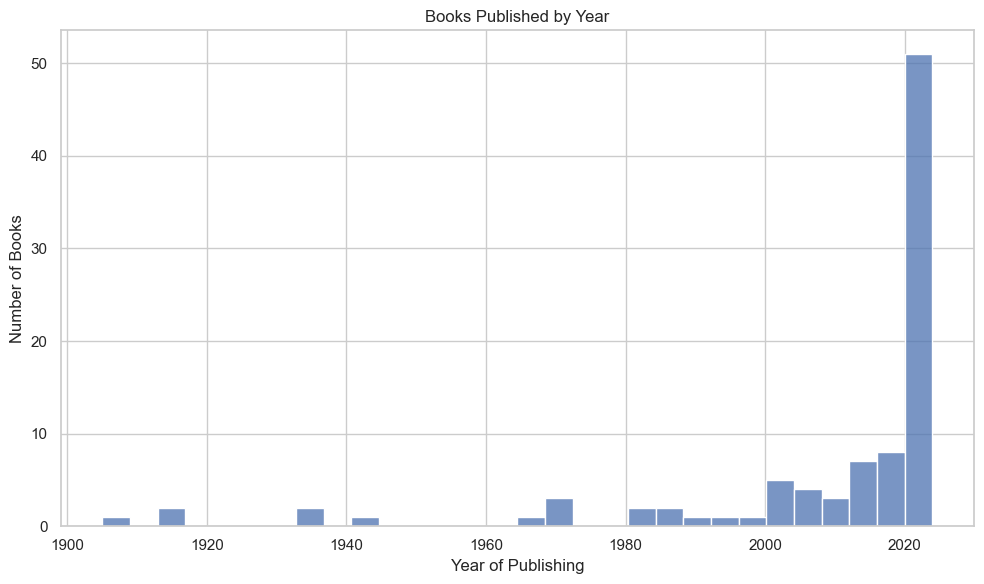

In [19]:
# Set seaborn style
sns.set(style="whitegrid")

# Visualization 1: Books Published by Year
plt.figure(figsize=(10, 6))
sns.histplot(df_all[df_all['year_of_publishing'] > 0]['year_of_publishing'], bins=30, kde=False)
plt.title("Books Published by Year")
plt.xlabel("Year of Publishing")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()






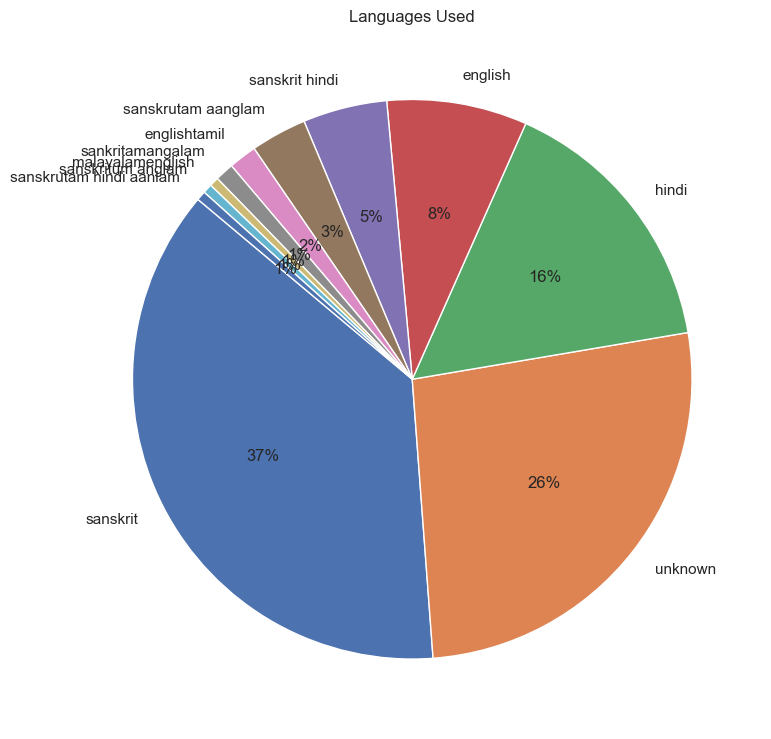

In [17]:
# Visualization 2: Languages Used
if 'language' in df_all.columns:
    language_series = df_all['language'].dropna().str.split(',').explode().str.strip()
    language_counts = language_series.value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(language_counts, labels=language_counts.index, autopct='%1.f%%', startangle=140)
    plt.title("Languages Used")
    plt.tight_layout()
    plt.show()

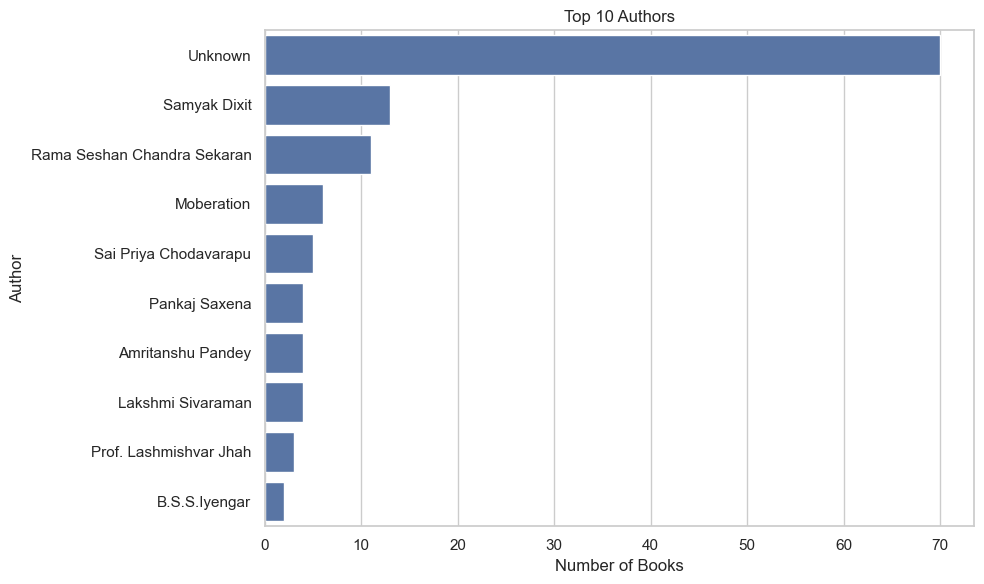

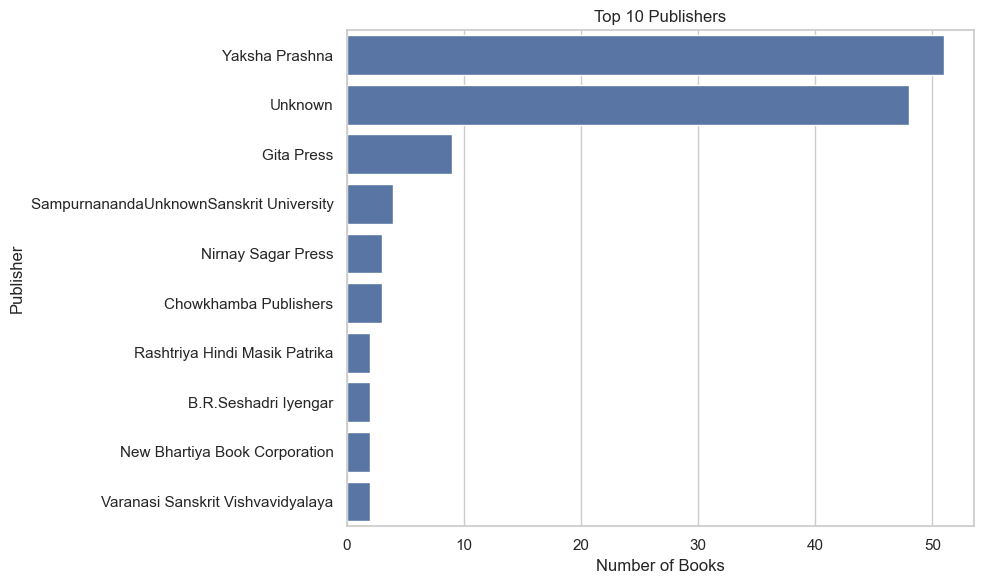

In [18]:
 #Visualization 3: Top 10 Authors
if 'name_of_the_author' in df_all.columns:
    top_authors = df_all['name_of_the_author'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_authors.values, y=top_authors.index)
    plt.title("Top 10 Authors")
    plt.xlabel("Number of Books")
    plt.ylabel("Author")
    plt.tight_layout()
    plt.show()

# Visualization 4: Top 10 Publishers
if 'publishers' in df_all.columns:
    top_publishers = df_all['publishers'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_publishers.values, y=top_publishers.index)
    plt.title("Top 10 Publishers")
    plt.xlabel("Number of Books")
    plt.ylabel("Publisher")
    plt.tight_layout()
    plt.show()